In [1]:
# imports
import libdtw as lib
from datetime import datetime
import pickle
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import numpy as np
from collections import defaultdict
from tqdm import tqdm
from copy import copy, deepcopy
import os
from model import *
from IPython.display import clear_output
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

C:\Users\DEPAGRA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


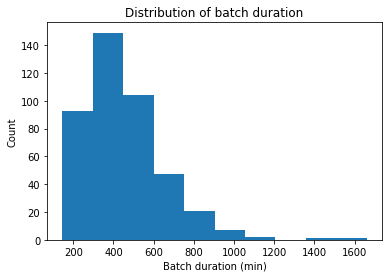

Min duration: 146
Max duration 1661


In [2]:
raw_data = lib.load_data(n_to_keep=1000)
_ = raw_data.pop('reference')
plt.hist([len(v[0]['values']) for k, v in raw_data.items()])
plt.title('Distribution of batch duration')
plt.xlabel('Batch duration (min)')
plt.ylabel('Count')
plt.show()
print("Min duration: %d\nMax duration %d"\
      %(min([len(v[0]['values']) for k, v in raw_data.items()]), max([len(v[0]['values']) for k, v in raw_data.items()])))

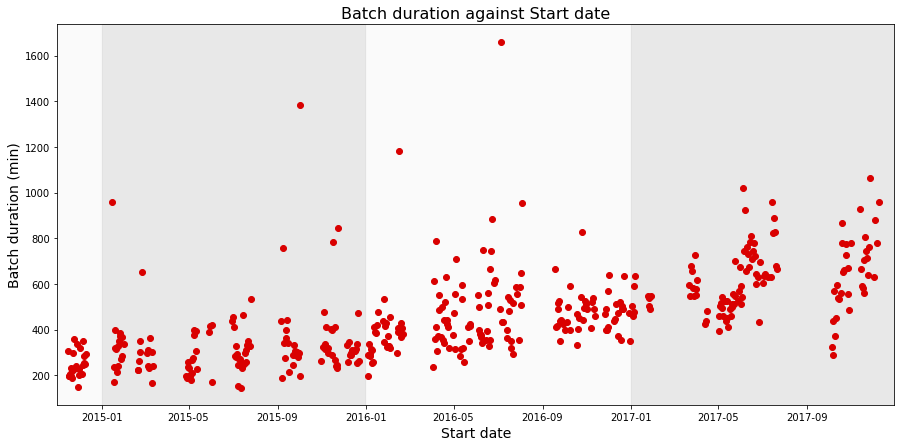

In [3]:
fig = plt.figure(figsize=(15,7))
for k, v in raw_data.items():
    plt.plot_date(date2num(datetime.strptime(v[0]['start'], '%Y-%m-%d %H:%M:%S')), len(v[0]['values']), color = '#d90000')
plt.xlabel('Start date', fontsize = 14)
plt.ylabel('Batch duration (min)', fontsize = 14)
plt.title('Batch duration against Start date', fontsize = 16)
plt.xlim((date2num(datetime.strptime('2014-11-01', '%Y-%m-%d')), 
          date2num(datetime.strptime('2017-12-31', '%Y-%m-%d'))))

plt.axvspan(date2num(datetime.strptime('2014-11-01', '%Y-%m-%d')), 
            date2num(datetime.strptime('2014-12-31', '%Y-%m-%d')), 
            color='#d2d2d2', alpha=0.1)

plt.axvspan(date2num(datetime.strptime('2015-01-01', '%Y-%m-%d')), 
            date2num(datetime.strptime('2015-12-31', '%Y-%m-%d')), 
            color='#d2d2d2', alpha=0.5)

plt.axvspan(date2num(datetime.strptime('2016-01-01', '%Y-%m-%d')), 
            date2num(datetime.strptime('2016-12-31', '%Y-%m-%d')), 
            color='#d2d2d2', alpha=0.1)

plt.axvspan(date2num(datetime.strptime('2017-01-01', '%Y-%m-%d')), 
            date2num(datetime.strptime('2017-12-31', '%Y-%m-%d')), 
            color='#d2d2d2', alpha=0.5)
plt.savefig('durVSstart.png')
plt.show()

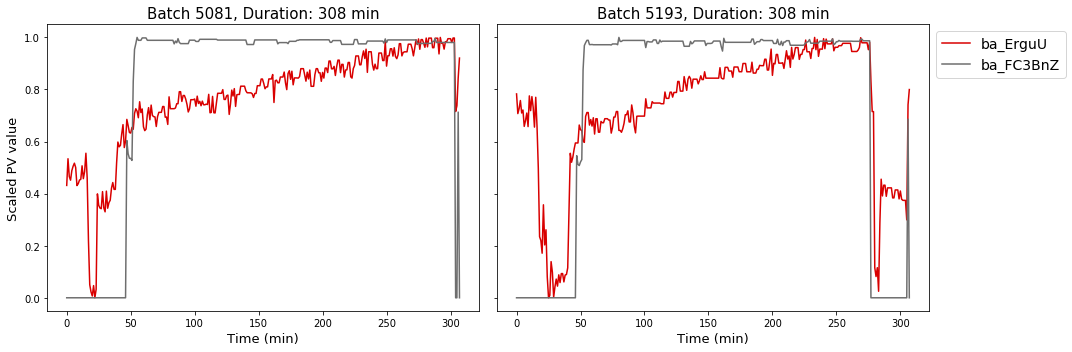

In [70]:
b1 = str(5081)
b2 = str(5193)
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15, 5), sharey=True)
ax0.plot(MinMaxScaler().fit_transform(np.array(list(filter(lambda x: x['name'] == 'ba_ErguU', raw_data[b1]))[0]['values']).reshape(-1, 1)), label = 'ba_ErguU', color = '#d90000')
ax0.plot(MinMaxScaler().fit_transform(np.array(list(filter(lambda x: x['name'] == 'ba_FC3BnZ', raw_data[b1]))[0]['values']).reshape(-1, 1)), label = 'ba_FC3BnZ', color = '#6e6e6e')
ax0.set_title('Batch %s, Duration: %d min'%(b1, len(raw_data[b1][0]['values'])), fontsize=15)
ax0.set_ylabel('Scaled PV value', fontsize=13)
ax0.set_xlabel('Time (min)', fontsize=13)

ax1.plot(MinMaxScaler().fit_transform(np.array(list(filter(lambda x: x['name'] == 'ba_ErguU', raw_data[b2]))[0]['values']).reshape(-1, 1)), label = 'ba_ErguU', color = '#d90000')
ax1.plot(MinMaxScaler().fit_transform(np.array(list(filter(lambda x: x['name'] == 'ba_FC3BnZ', raw_data[b2]))[0]['values']).reshape(-1, 1)), label = 'ba_FC3BnZ', color = '#6e6e6e')
ax1.set_title('Batch %s, Duration: %d min'%(b2, len(raw_data[b2][0]['values'])), fontsize=15)
ax1.set_xlabel('Time (min)', fontsize=13)
ax1.legend(bbox_to_anchor=(1., 1.0), fontsize = 14)
plt.tight_layout()
plt.savefig('batchcloseduration.png')
plt.show()

In [55]:
lens = defaultdict(list)
for k, v in raw_data.items():
    if k != 'reference':
        lens[len(v[0]['values'])].append(k)
lens

defaultdict(list,
            {308: ['5081', '5193'],
             197: ['5082', '5083', '5086', '5141'],
             206: ['5084'],
             233: ['5085', '5140', '5217'],
             218: ['5087'],
             189: ['5088', '5181'],
             296: ['5089', '5128'],
             227: ['5090'],
             359: ['5091'],
             231: ['5092', '5131', '5168'],
             240: ['5093', '5113', '5135'],
             336: ['5094', '5206', '5229', '5235'],
             150: ['5095'],
             202: ['5096'],
             225: ['5097'],
             317: ['5098'],
             207: ['5099'],
             243: ['5100'],
             351: ['5101'],
             285: ['5102', '5119'],
             252: ['5103', '5169'],
             247: ['5104'],
             293: ['5105', '5236'],
             960: ['5106', '5464'],
             169: ['5107', '5155'],
             235: ['5108', '5138'],
             320: ['5109', '5208', '5256'],
             399: ['5110', '5186', '5303',

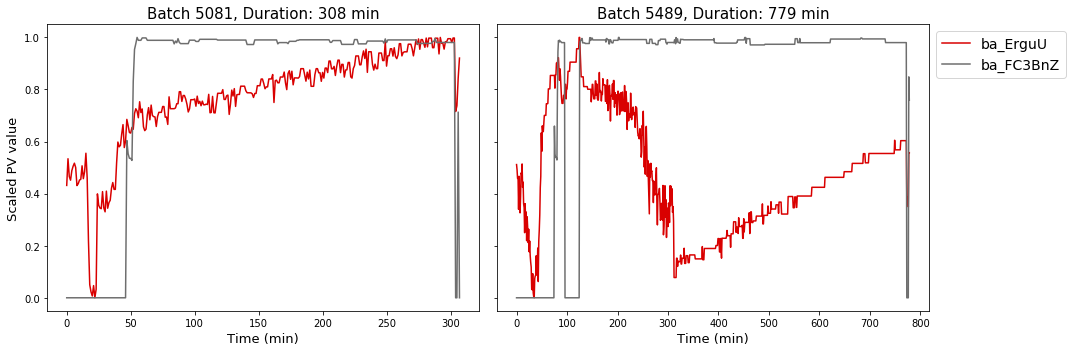

In [96]:
b1 = str(5081)
b2 = str(5489)
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15, 5), sharey=True)
ax0.plot(MinMaxScaler().fit_transform(np.array(list(filter(lambda x: x['name'] == 'ba_ErguU', raw_data[b1]))[0]['values']).reshape(-1, 1)), label = 'ba_ErguU', color = '#d90000')
ax0.plot(MinMaxScaler().fit_transform(np.array(list(filter(lambda x: x['name'] == 'ba_FC3BnZ', raw_data[b1]))[0]['values']).reshape(-1, 1)), label = 'ba_FC3BnZ', color = '#6e6e6e')
ax0.set_title('Batch %s, Duration: %d min'%(b1, len(raw_data[b1][0]['values'])), fontsize=15)
ax0.set_ylabel('Scaled PV value', fontsize=13)
ax0.set_xlabel('Time (min)', fontsize=13)

ax1.plot(MinMaxScaler().fit_transform(np.array(list(filter(lambda x: x['name'] == 'ba_ErguU', raw_data[b2]))[0]['values']).reshape(-1, 1)), label = 'ba_ErguU', color = '#d90000')
ax1.plot(MinMaxScaler().fit_transform(np.array(list(filter(lambda x: x['name'] == 'ba_FC3BnZ', raw_data[b2]))[0]['values']).reshape(-1, 1)), label = 'ba_FC3BnZ', color = '#6e6e6e')
ax1.set_title('Batch %s, Duration: %d min'%(b2, len(raw_data[b2][0]['values'])), fontsize=15)
ax1.set_xlabel('Time (min)', fontsize=13)
ax1.legend(bbox_to_anchor=(1., 1.0), fontsize = 14)
plt.tight_layout()
plt.savefig('batchdiffdur.png')
plt.show()

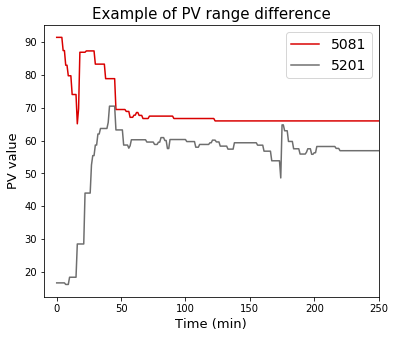

In [123]:
#b = 5200
b1 = str(5081)
b2 = str(5201)
fig, ax0 = plt.subplots(1,1, figsize=(6, 5), sharey=True)
ax0.plot(list(filter(lambda x: x['name'] == 'ba_TIJSj', raw_data[b1]))[0]['values'], label = b1, color = '#d90000')
ax0.plot(list(filter(lambda x: x['name'] == 'ba_TIJSj', raw_data[b2]))[0]['values'], label = b2, color = '#6e6e6e')
ax0.legend(fontsize = 14)
ax0.set_xlabel('Time (min)', fontsize = 13)
ax0.set_xlim(-10,250)
ax0.set_ylabel('PV value', fontsize = 13)
#plt.tight_layout()
ax0.set_title('Example of PV range difference', fontsize=15)
plt.savefig('diffMagn.png')
plt.show()
b+=1

In [120]:
min_pvs = min([len(v) for k, v in raw_data.items() if k != 'reference'])
print(min_pvs)

max_pvs = max([len(v) for k, v in raw_data.items() if k != 'reference'])
print(max_pvs)

91
99


In [ ]:
x = np.arange(-5,5)
h = np.arange(20, 10, -1) + np.random.normal(0,1,10)

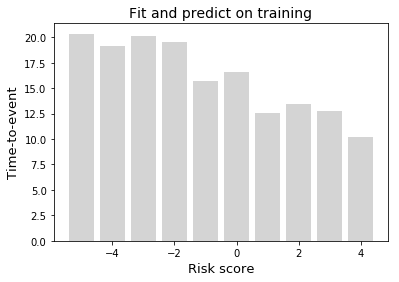

In [32]:
plt.bar(x,h, color = '#d2d2d2')
plt.xlabel('Risk score', fontsize = 13)
plt.ylabel('Time-to-event', fontsize = 13)
plt.title('Fit and predict on training', fontsize = 14)
plt.savefig('SAtr.png')
plt.show()

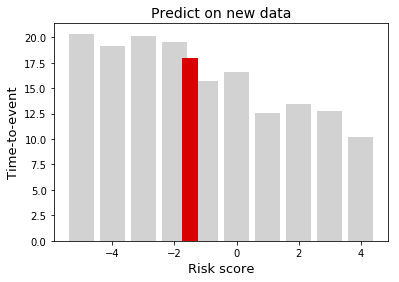

In [33]:
x1 = -1.5
h1 = 18
plt.bar(x,h, color = '#d2d2d2')
plt.bar(x1,h1,width = 0.5, color = '#d90000')
plt.xlabel('Risk score', fontsize = 13)
plt.ylabel('Time-to-event', fontsize = 13)
plt.title('Predict on new data', fontsize = 14)
plt.savefig("SAte.png")
plt.show()